In [1]:
import numpy as np
import pandas as pd
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
from TicTacToe.human import Human as human
from TicTacToe.duel import duel, play_n_duels

# Value iteration

## Value iteration player vs random player

In [2]:
from TicTacToe.agent_value_iteration import AgentVI as avi
from TicTacToe.agent_random import RandomAgent as random_agent

In [3]:
agent1 = avi()
agent2 = random_agent()
human = human()

In [4]:
prob = play_n_duels(5000, agent2, agent1)

In [5]:
agent1.wins

3718

In [6]:
agent1.rewards

defaultdict(float,
            {(3, 0, 750): -0.0,
             (5, 8, 752): 0.0,
             (750, 0, 7313): -0.0,
             (752, 8, 7367): 0.0,
             (7313, 3, 7610): -0.0,
             (7367, 5, 7772): 0.0,
             (7610, 4, 9959): -1.0,
             (7772, 7, None): 1.0,
             (1, 1, 88): -0.0,
             (7, 4, 98): 0.0,
             (88, 2, 125): -0.0,
             (98, 3, 403): 0.0,
             (125, 5, 2590): -0.0,
             (403, 7, 4048): 0.0,
             (2590, 6, 10609): -1.0,
             (4048, 8, None): 1.0,
             (3, 0, 14): -0.0,
             (5, 2, 68): 0.0,
             (14, 3, 773): -0.0,
             (68, 6, 935): 0.0,
             (773, 4, 1178): -0.0,
             (935, 5, 3632): -1.0,
             (1178, 7, None): 1.0,
             (1, 2, 14): -0.0,
             (11, 1, 76): 0.0,
             (14, 5, 157): -0.0,
             (76, 4, 2039): 0.0,
             (157, 8, 2066): -0.0,
             (2039, 3, 10820): 0.0,
          

In [7]:
prob

array([0.78      , 0.77      , 0.78      , 0.7925    , 0.802     ,
       0.83      , 0.84571429, 0.8525    , 0.86777778, 0.877     ,
       0.88272727, 0.88333333, 0.88384615, 0.88714286, 0.89      ,
       0.891875  , 0.89823529, 0.90222222, 0.90631579, 0.9075    ,
       0.91190476, 0.91409091, 0.91652174, 0.91958333, 0.9192    ,
       0.92153846, 0.92296296, 0.92142857, 0.92275862, 0.92166667,
       0.92419355, 0.9253125 , 0.92727273, 0.92852941, 0.92828571,
       0.92972222, 0.93054054, 0.93026316, 0.93153846, 0.933     ,
       0.93292683, 0.93238095, 0.93139535, 0.93113636, 0.93066667,
       0.93086957, 0.9312766 , 0.930625  , 0.93081633, 0.9322    ])

Text(0, 0.5, 'Porcentaje de juegos ganados')

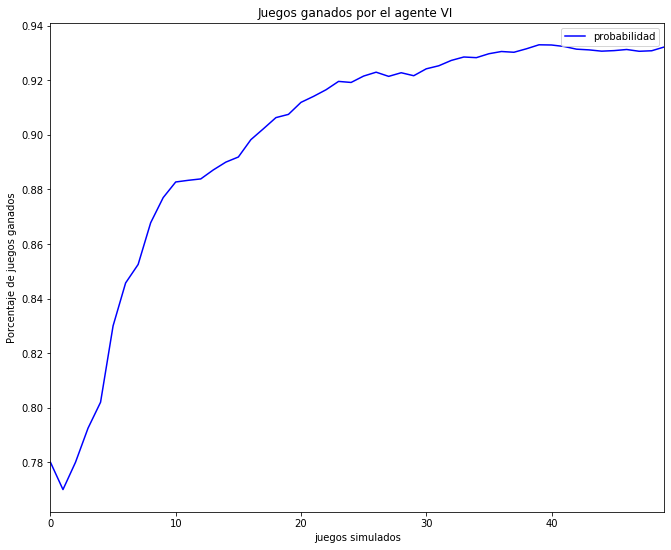

In [8]:
df = pd.DataFrame({ 'probabilidad' :prob })

figsize(11, 9)
df.plot(title='Juegos ganados por el agente VI ',color='b')
plt.xlabel("juegos simulados(x 100) ")
plt.ylabel("Frecuencia relativa de juegos ganados ")

# Monte Carlo  

## Monte Carlo player vs random player

In [9]:
from TicTacToe.agent_mc import AgentMC as amc
from TicTacToe.human import Human as human

In [10]:
player1 = amc()

In [11]:
playerX = agent2
playerO = player1

In [12]:
prob = play_n_duels(10000, playerX, playerO)

In [13]:
vals = [(k,v) for k, v in player1.values.items() if v != 0]

In [14]:
len(vals)# +138

553

In [15]:
player1.wins

7657

Text(0, 0.5, 'Porcentaje de juegos ganados (%)')

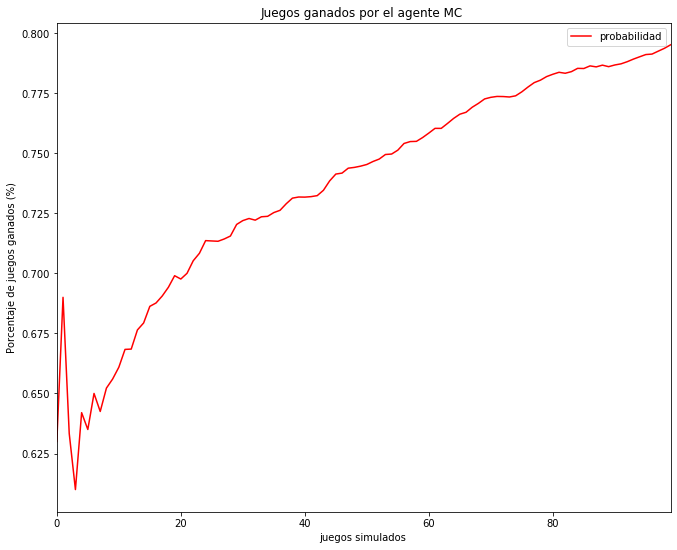

In [16]:
df = pd.DataFrame({ 'probabilidad' :prob })

figsize(11, 9)
df.plot(title='Juegos ganados por el agente MC ',color='r')
plt.xlabel("juegos simulados(x 100) ")
plt.ylabel("Frecuencia relativa de juegos ganados ")

# Q-Learning

## Q-Learning player vs random player

In [17]:
from TicTacToe.agent_tabular_qlearning import Agent_TQL as atql

In [21]:
agent7 = atql()
agent7.epsilon = 0.2
agent7.alpha = 0.02
agent7.gamma = 0.7


playerX = agent2
playerO = agent7
    
frec = play_n_duels(25000, playerX, playerO)

Text(0, 0.5, 'Porcentaje de juegos ganados (%)')

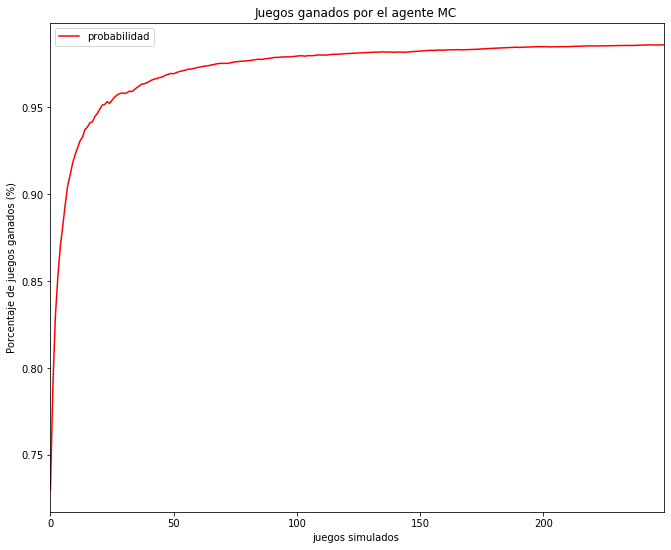

In [22]:
df = pd.DataFrame({ 'probabilidad' :frec })

figsize(11, 9)
df.plot(title='Juegos ganados por el agente Q learning ',color='r')
plt.xlabel("juegos simulados(x 100) ")
plt.ylabel("Frecuencia relativa de juegos ganados ")
plt.show()

## Comparación de parametros

In [18]:
epsilons  = [0.01, 0.4, 0.8]
alphas = [0.001, 0.02, 0.3]
gammas = [0.02, 0.1, 0.5]
frecs = list()

In [19]:
for eps, alf , gam in zip(epsilons, alphas, gammas):
    agent5 = atql()
    agent5.epsilon = eps
    agent5.alpha = alf
    agent5.gamma = gam 
    
    playerX = agent2
    playerO = agent5
    
    frecs.append(play_n_duels(18000, playerX, playerO))

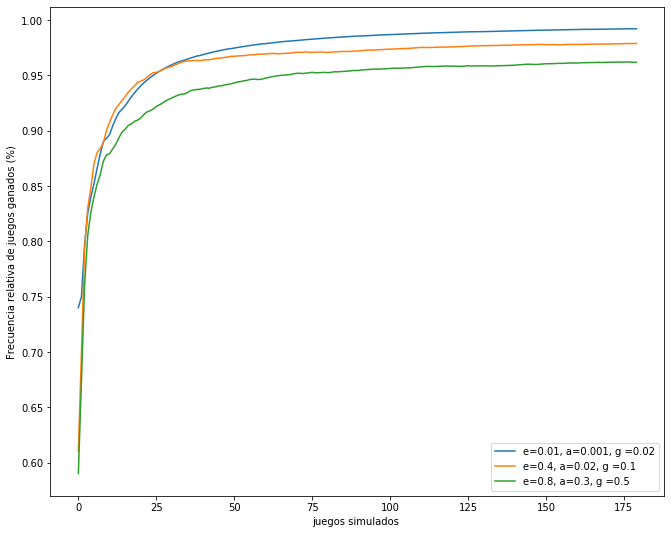

In [20]:
x = np.arange(180)
legends = list()

i = 0
for e, a ,g in zip(epsilons, alphas, gammas): 
    plt.plot(x, frecs[i])
    legends.append('e='+str(e)+', a='+str(a)+', g ='+str(g))
    i +=1
        
figsize(11, 9)
plt.legend(legends, loc='lower right')
plt.xlabel("juegos simulados(x 100) ")
plt.ylabel("Frecuencia relativa de juegos ganados ")
plt.show()

Text(0, 0.5, 'Porcentaje de juegos ganados (%)')

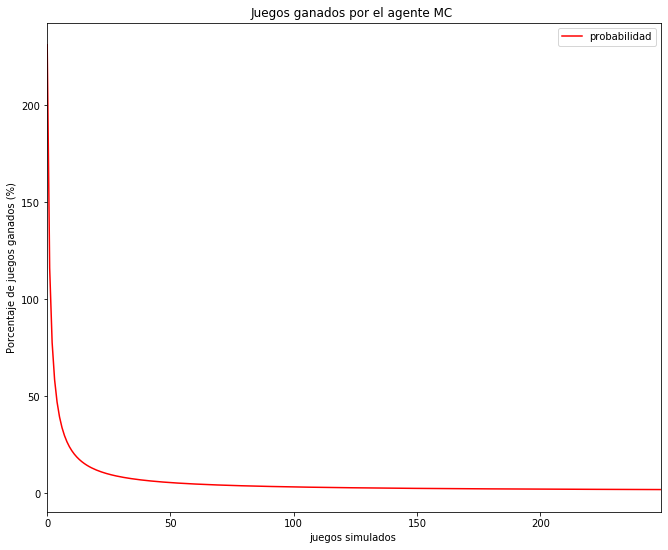

In [23]:
import copy


playerX = agent7
playerO = copy.copy(agent7)
    
frec = play_n_duels(25000, playerX, playerO)
df = pd.DataFrame({ 'probabilidad' :frec })

figsize(11, 9)
df.plot(title='Juegos ganados por el agente MC ',color='r')
plt.xlabel("juegos simulados(x 100) ")
plt.ylabel("Frecuencia relativa de juegos ganados ")

In [24]:
#df = pd.DataFrame({ 'probabilidad' :prob })

#figsize(11, 9)
#df.plot(title='Juegos ganados por el agente Q ',color='r')


In [25]:
n = 1
frecs = list()
aux = agent5

for _ in range(n):
    agentq = atql()
    agentq.epsilon = 0.4
    agentq.alpha = 0.02
    agentq.gamma = 0.1
    
    aux.epsilon = 0.1
    playerX = aux
    playerO = agentq
    playerX.set_role('X')
    playerO.set_role('O')
    
    frecs.append(play_n_duels(18000, playerX, playerO))
    aux = agentq

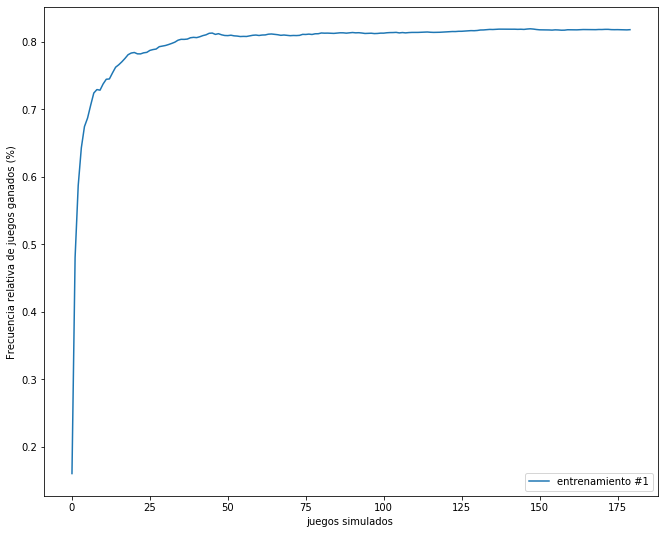

In [26]:
x = np.arange(180)
legends = list()

i = 0
for i in range(n): 
    plt.plot(x, frecs[i])
    legends.append('entrenamiento #'+str(i+1))
    
plt.legend(legends, loc='lower right')
plt.xlabel("juegos simulados(x 100) ")
plt.ylabel("Frecuencia relativa de juegos ganados ")
plt.show()

# Q-Learning player vs human player

In [27]:
from TicTacToe.human import Human as human
human = human()

In [28]:
agent7.epsilon = 0

agent7.wins = 0


In [ ]:
#play_n_duels(3, human, agent7, show=True)


              |  | 
            ----------
              |  | 
            ----------
              |  | 
        


In [ ]:
#agent7.wins

In [ ]:
#duel(human, agentq, show=True)

In [ ]:
#agent5.wins

In [ ]:
#agent7.values

In [ ]:
#agent7.state_to_matrix(agent7.key_to_state(910))

# SARSA

## SARSA player vs random player

In [ ]:
from TicTacToe.agent_sarsa import Agent_SARSA as asarsa

In [ ]:
agent6 = asarsa()

In [ ]:
playerX = agent2
playerO = agent6

In [ ]:
prob = play_n_duels(15000, playerX, playerO)

In [ ]:
vals = [(k,v) for k, v in agent6.values.items() if v != 0]

In [ ]:
len(vals)

In [ ]:
agent6.wins

In [ ]:
df = pd.DataFrame({ 'probabilidad' :prob })

figsize(11, 9)
df.plot(title='Juegos ganados por el agente SARSA ',color='r')
plt.xlabel("juegos simulados(x 100) ")
plt.ylabel("Frecuencia relativa de juegos ganados ")

In [ ]:
playerX = agent5
playerO = agent6
prob = play_n_duels(15000, playerX, playerO)

In [ ]:
df = pd.DataFrame({ 'probabilidad' :prob })

figsize(11, 9)
df.plot(title='Juegos ganados por el agente SARSA ',color='r')
plt.xlabel("juegos simulados ")
plt.ylabel("Porcentaje de juegos ganados (%)")

In [ ]:
agent6.wins

In [ ]:
agent6.set_role('X')
duel(agent6, human, show=True)

# Campeonato

In [ ]:
from random import shuffle 

def campeonato(array):
    jugadores = array
    pasan = []
    j = 0
    shuffle(jugadores) #Revuelve los jugadores
    for _ in range(len(array)/2):
        jugadores[j].set_role('X')
        jugadores[j+1].set_role('O')
        ganador = duel(jugadores[j],jugadores[j+1],show = True)
        if ganador == 1:
            pasan.append(jugadores[j])
        else:
            pasan.append(jugadores[j+1])
        j+=2
        
    j = 0
    if len(pasan) > 1:
        campeonato(pasan)
    else:
        ganador = pasan[0]
        return ganador


In [ ]:
def campeonatos(n,puntos):
    for _ in range(n):
        i = campeonato(Agentes)
        puntos[i] = puntos[i] + 1

    return puntos

print(campeonatos(100,puntuacion))